# Descriptive Analytics of Weather History Dataset

# 1. Import Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# 2. Load the Dataset

In [4]:
df1 = pd.read_csv('weatherHistory.csv')

In [6]:
df1.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# 3. Exploratory Data Anaysis

In [11]:
df2 = df1

## Changing the Datetime string to `datetime` object and setting it as index

`raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')`

Date: `2006-04-01 00:00:00.000 +0200`

In [13]:
df2['Formatted Date'] = pd.to_datetime(df2['Formatted Date'], utc=True)
df2['Formatted Date'] = df2['Formatted Date'].apply(lambda x: x.replace(tzinfo=None))
df2['Formatted Date'] =  pd.to_datetime(df2['Formatted Date'], format='%d-%m-%Y %H:%M')
df2 = df2.set_index('Formatted Date')

# Basic statistics
Count,
Mean,
Standard Deviation,
Minimum Value,
25th Percentile,
50th Percentile (Median),
75th Percentile,
Maximum Value.

### Converting Pressure to bars for data stake

In [34]:
df2['Pressure (millibars)'] = df2['Pressure (millibars)'] / 1000

df2.rename(columns = {'Pressure (millibars)':'Pressure (bars)'}, inplace = True)

# Univariate analysis

In [38]:
df2.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (bars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1.003236
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,0.116970
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1.011900
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1.016450
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1.021090
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1.046380


<AxesSubplot:>

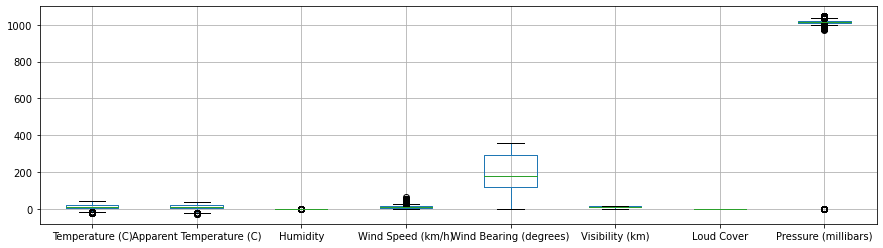

In [20]:
df2.boxplot(figsize=(15, 4))

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

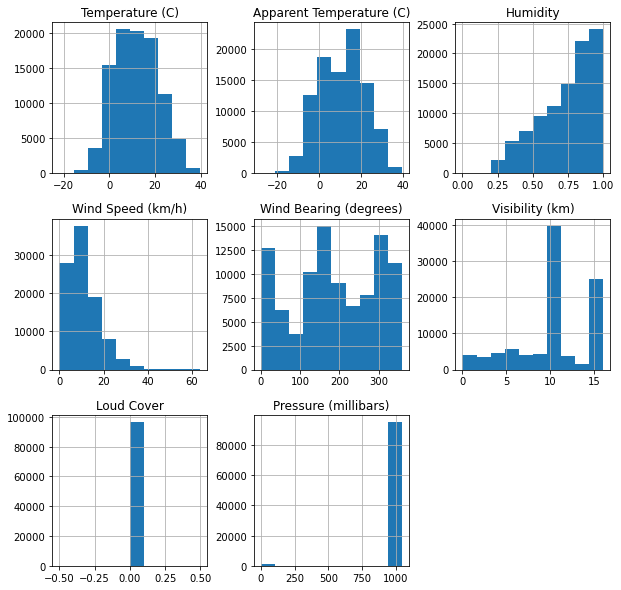

In [22]:
df2.hist(figsize=(10, 10))

## Standard Deviation

In [69]:
df2.std()

Temperature (C)               9.551546
Apparent Temperature (C)     10.696847
Humidity                      0.195473
Wind Speed (km/h)             6.913571
Wind Bearing (degrees)      107.383428
Visibility (km)               4.192123
Loud Cover                    0.000000
Pressure (bars)               0.116970
dtype: float64

## Mode

In [70]:
df2.mode()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (bars),Daily Summary
0,Partly Cloudy,rain,7.222222,12.777778,0.93,3.22,0.0,9.982,0.0,0.0,Mostly cloudy throughout the day.


## Kurtosis

In [71]:
df2.kurtosis()

Temperature (C)             -0.566791
Apparent Temperature (C)    -0.706844
Humidity                    -0.462170
Wind Speed (km/h)            1.769284
Wind Bearing (degrees)      -1.131534
Visibility (km)             -0.260339
Loud Cover                   0.000000
Pressure (bars)             69.268758
dtype: float64

## Skewness

In [72]:
df2.skew()

Temperature (C)             0.094127
Apparent Temperature (C)   -0.057302
Humidity                   -0.715880
Wind Speed (km/h)           1.113493
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Loud Cover                  0.000000
Pressure (bars)            -8.422506
dtype: float64

## Plotting Line Plot

Text(0.5, 1.0, 'Temperature (C)')

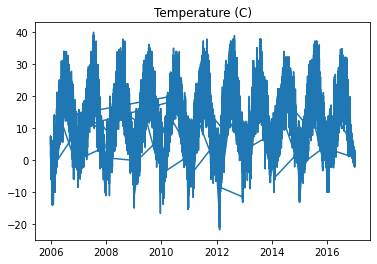

In [27]:
plt.plot(df2.index, df2['Temperature (C)'])
plt.title("Temperature (C)")

Text(0.5, 1.0, 'Apparent Temperature (C)')

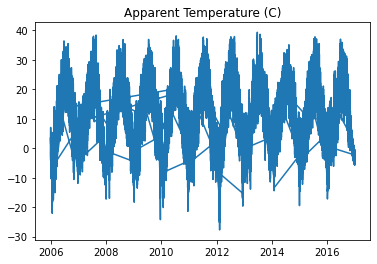

In [28]:
plt.plot(df2.index, df2['Apparent Temperature (C)'])
plt.title("Apparent Temperature (C)")

Text(0.5, 1.0, 'Humidity')

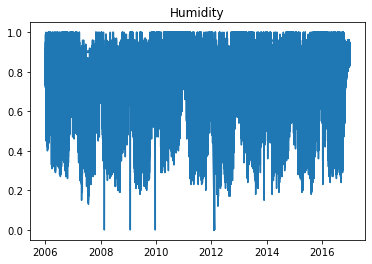

In [29]:
plt.plot(df2.index, df2['Humidity'])
plt.title("Humidity")

Text(0.5, 1.0, 'Wind Speed (km/h)')

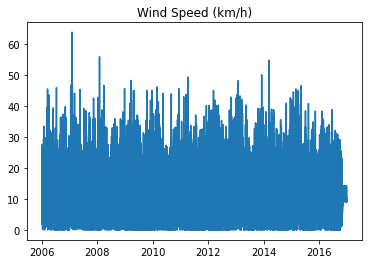

In [30]:
plt.plot(df2.index, df2['Wind Speed (km/h)'])
plt.title("Wind Speed (km/h)")

Text(0.5, 1.0, 'Visibility (km)')

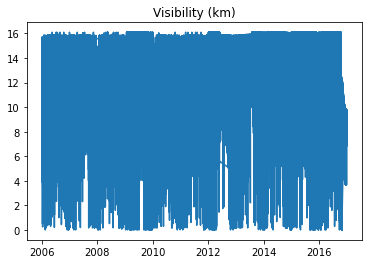

In [31]:
plt.plot(df2.index, df2['Visibility (km)'])
plt.title("Visibility (km)")

Text(0.5, 1.0, 'Pressure (bars)')

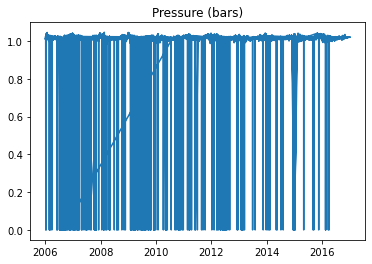

In [35]:
plt.plot(df2.index, df2['Pressure (bars)'])
plt.title("Pressure (bars)")

Text(0.5, 1.0, 'Loud Cover')

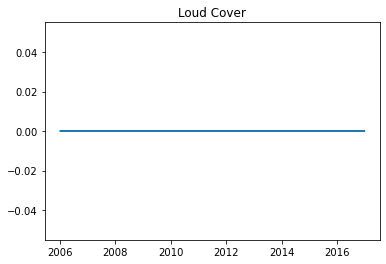

In [36]:
plt.plot(df2.index, df2['Loud Cover'])
plt.title("Loud Cover")

Text(0.5, 1.0, 'Wind Bearing (degrees)')

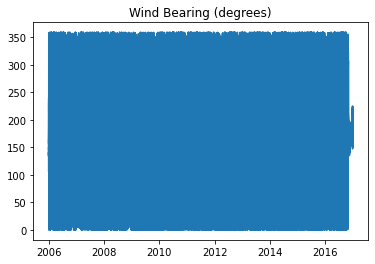

In [37]:
plt.plot(df2.index, df2['Wind Bearing (degrees)'])
plt.title("Wind Bearing (degrees)")

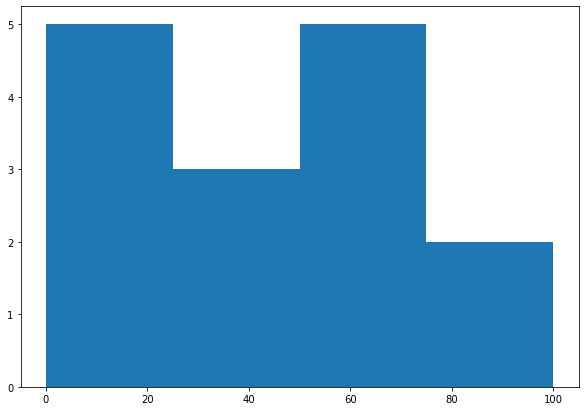

In [1]:
from matplotlib import pyplot as plt
import numpy as np

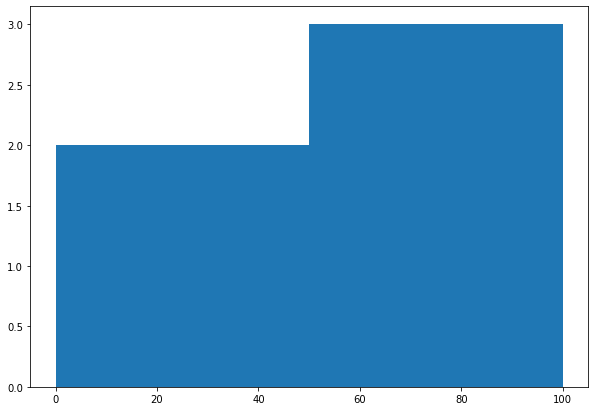

In [5]:
# Creating dataset
a = np.array([10,20,30,40,50,60,70,80,90,100])
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()